In [1]:
import numpy as np
import pandas as pd

from src.constant import DATA_DIR, MAIN_DIR
from src.database import DB
from src.database.queries import *
from src.instance.InstanceList import InstanceList
from src.instance.TSP_Instance import TSP_from_index_file
from src.solver.TSP_LKH_Solver import TSP_LKH_Solver

In [2]:
import matplotlib.pyplot as plt

plt.rcParams["axes.grid"] = True
plt.rcParams["grid.alpha"] = 0.2
plt.rcParams["grid.color"] = "#cccccc"
plt.rcParams["axes.xmargin"] = 0

db_path = list((MAIN_DIR / "_archive" / "experiments" / "2025-01-27" / "200" / "database").glob(f"run-plain-30-*.db"))[1]
db = DB(db_path)
results = pd.read_sql_query("SELECT * FROM results", db._conn)
results.loc[
    results["prefix"].str.startswith("config")
    & results["cached"].eq(0)
    & results["surrogate"].eq(0)
    & results["cost"].lt(TSP_LKH_Solver.MAX_COST),
    "time",
].plot.hist(bins=50)
plt.xlim(0, 10)
plt.title
plt.show()

IndexError: list index out of range

In [125]:
results.loc[
    results["prefix"].str.startswith("config")
    & results["cached"].eq(0)
    & results["surrogate"].eq(0)
    & results["cost"].lt(TSP_LKH_Solver.MAX_COST),
    "time",
].describe()

count    3267.000000
mean        1.051145
std         1.796130
min         0.000000
25%         0.060000
50%         0.260000
75%         1.090000
max         9.920000
Name: time, dtype: float64

In [126]:
(4500 - 3267) / 4500, 3267 / 4500

(0.274, 0.726)

In [164]:
results.loc[
    results["prefix"].str.startswith("config")
    & results["cached"].eq(0)
    & results["surrogate"].eq(0)
    & results["cost"].lt(0.37),
    "time",
].describe()

count    1836.000000
mean        0.112002
std         0.167162
min         0.000000
25%         0.040000
50%         0.075000
75%         0.160000
max         5.805047
Name: time, dtype: float64

In [169]:
(results.loc[
    results["prefix"].str.startswith("config")
    & results["cached"].eq(0)
    & results["surrogate"].eq(0)
    & results["cost"].lt(0.37),
    "time",
].sum() + (4500 - 1836) * 0.37) / 3600

0.33092104442384507

In [170]:
0.33 / 8.91

0.037037037037037035

In [165]:
(4500 - 1836) / 4500, 1836 / 4500

(0.592, 0.408)

In [166]:
0.11 / 2.88

0.03819444444444445

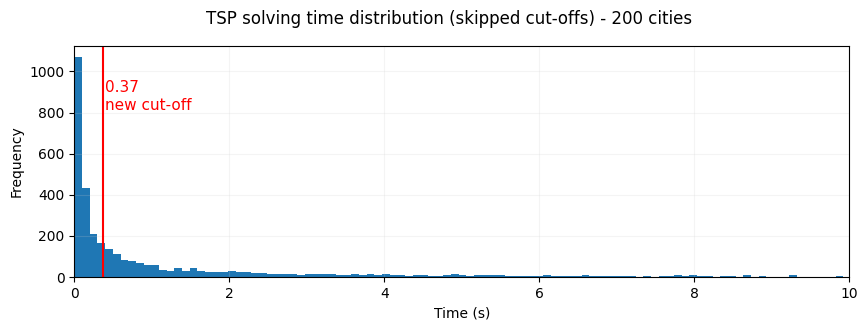

In [163]:
db_path = list((MAIN_DIR / "_archive" / "experiments" / "2025-01-27" / "200" / "database").glob(f"run-plain-30-*.db"))[1]
db = DB(db_path)
results = pd.read_sql_query("SELECT * FROM results", db._conn)
results.loc[
    results["prefix"].str.startswith("config")
    & results["cached"].eq(0)
    & results["surrogate"].eq(0)
    & results["cost"].lt(TSP_LKH_Solver.MAX_COST),
    "time",
].plot.hist(bins=100, figsize=(10, 3))
plt.xlim(0, 10)
plt.axvline(0.37, color="red")
plt.text(0.40, 800, "0.37\nnew cut-off", color="red", fontsize=11, verticalalignment="bottom")
plt.suptitle("TSP solving time distribution (skipped cut-offs) - 200 cities", y=1.)
plt.savefig("tmp.png", dpi=300, bbox_inches="tight")
plt.xlabel("Time (s)")
plt.show()

In [89]:
results.loc[
    results["prefix"].str.startswith("config")
    & results["cached"].eq(0)
    & results["surrogate"].eq(0),
    "time",
].sum() / 3600

4.390004792473051

<Axes: ylabel='Frequency'>

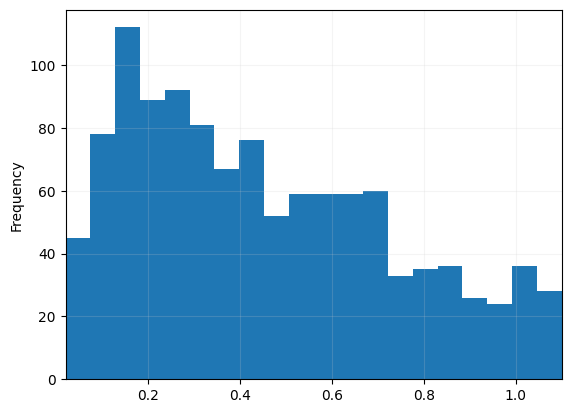

In [27]:
db_path = list((MAIN_DIR / "database").glob(f"run-plain-30-*.db"))[1]
db = DB(db_path)
results = pd.read_sql_query("SELECT * FROM results", db._conn)
results.loc[
    results["prefix"].str.startswith("config")
    & results["cached"].eq(0)
    & results["surrogate"].eq(0)
    & results["cost"].lt(11.1),
    "time",
].plot.hist(bins=20)

In [30]:
_ = pd.read_sql_query("SELECT * FROM instances", db._conn)
_

,id,filepath,optimum
0,1578235657227061094,TSP/TRAIN/cluster_netgen/000.tsp,7355676.0
1,893621508674833164,TSP/TRAIN/cluster_netgen/001.tsp,7389529.0
2,73241404596093834,TSP/TRAIN/cluster_netgen/002.tsp,8103558.0
3,1896746357908744151,TSP/TRAIN/cluster_netgen/003.tsp,7511247.0
4,974667721789580017,TSP/TRAIN/cluster_netgen/004.tsp,7167661.0
...,...,...,...
75,990506385848230246,TSP/TEST/uniform_portgen/000.tsp,14922726.0
76,256395823103496539,TSP/TEST/uniform_portgen/001.tsp,14747599.0
77,1696517368339761942,TSP/TEST/uniform_portgen/002.tsp,14887528.0
78,1493023541108189632,TSP/TEST/uniform_portgen/003.tsp,14696320.0


In [24]:
results.loc[
    results["prefix"].str.startswith("config")
    & results["cached"].eq(0)
    & results["surrogate"].eq(0)
    & results["cost"].lt(11.1),
    "time",
].describe()

count    1147.000000
mean        0.455153
std         0.282336
min         0.020000
25%         0.220000
50%         0.400000
75%         0.660000
max         1.100000
Name: time, dtype: float64

In [26]:
results.loc[
    results["prefix"].str.startswith("config")
    & results["cached"].eq(0)
    & results["surrogate"].eq(0),
    "time",
].sum() / 3600

1.1788583333333333

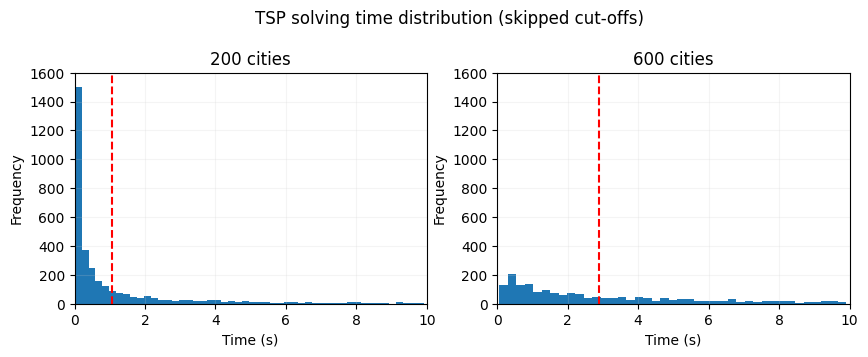

In [159]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))

db_path = list((MAIN_DIR / "_archive" / "experiments" / "2025-01-27" / "200" / "database").glob(f"run-plain-30-*.db"))[1]
db = DB(db_path)
results = pd.read_sql_query("SELECT * FROM results", db._conn)
_ = results.loc[
    results["prefix"].str.startswith("config")
    & results["cached"].eq(0)
    & results["surrogate"].eq(0)
    & results["cost"].lt(TSP_LKH_Solver.MAX_COST),
    "time",
]
_.plot.hist(bins=50, ax=ax1)
ax1.axvline(_.mean(), color="red", linestyle="--")
ax1.set_xlim(0, 10)
ax1.set_ylim(0, 1600)
ax1.set_title("200 cities")
ax1.set_xlabel("Time (s)")

db_path = list((MAIN_DIR / "_archive" / "experiments" / "2025-01-27" / "600" / "database").glob(f"run-plain-30-*.db"))[3]
db = DB(db_path)
results = pd.read_sql_query("SELECT * FROM results", db._conn)
_ = results.loc[
    results["prefix"].str.startswith("config")
    & results["cached"].eq(0)
    & results["surrogate"].eq(0)
    & results["cost"].lt(TSP_LKH_Solver.MAX_COST),
    "time",
]
_.plot.hist(bins=50)
ax2.axvline(_.mean(), color="red", linestyle="--")
ax2.set_xlim(0, 10)
ax2.set_ylim(0, 1600)
ax2.set_title("600 cities")
ax2.set_xlabel("Time (s)")

plt.suptitle("TSP solving time distribution (skipped cut-offs)", y=1.09)
plt.savefig("tmp.png", dpi=300, bbox_inches="tight")
plt.show()

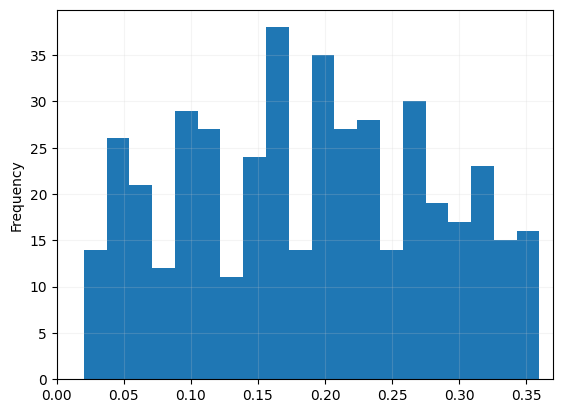

In [182]:

db_path = list((MAIN_DIR / "database").glob(f"run-plain-30-979060.db"))[0]
db = DB(db_path)
results = pd.read_sql_query("SELECT * FROM results", db._conn)
results.loc[
    results["prefix"].str.startswith("config")
    & results["cached"].eq(0)
    & results["surrogate"].eq(0)
    & results["cost"].lt(3.7),
    "time",
].plot.hist(bins=20)
plt.xlim(0, 0.37)
plt.title
plt.show()

In [185]:
results.loc[
    results["prefix"].str.startswith("config")
    & results["cached"].eq(0)
    & results["surrogate"].eq(0)
    & results["cost"].lt(3.2),
    "time",
].describe()

count    440.000000
mean       0.187886
std        0.092166
min        0.020000
25%        0.110000
50%        0.190000
75%        0.260000
max        0.360000
Name: time, dtype: float64

In [191]:
(results.loc[
    results["prefix"].str.startswith("config")
    & results["cached"].eq(0)
    & results["surrogate"].eq(0)
    & results["cost"].lt(3.7),
    "time",
].sum() + (4500 - 440) * 3.7) / 3600

4.195741666666667

In [192]:
440 / 4500

0.09777777777777778

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))

db_path = list((MAIN_DIR / "_archive" / "experiments" / "2025-01-27" / "200" / "database").glob(f"run-plain-30-*.db"))[1]
db = DB(db_path)
results = pd.read_sql_query("SELECT * FROM results", db._conn)
_ = results.loc[
    results["prefix"].str.startswith("config")
    & results["cached"].eq(0)
    & results["surrogate"].eq(0)
    & results["cost"].lt(TSP_LKH_Solver.MAX_COST),
    "time",
]
_.plot.hist(bins=50, ax=ax1)
ax1.axvline(_.mean(), color="red", linestyle="--")
ax1.set_xlim(0, 10)
ax1.set_ylim(0, 1600)
ax1.set_title("200 cities")
ax1.set_xlabel("Time (s)")

db_path = list((MAIN_DIR / "_archive" / "experiments" / "2025-01-27" / "600" / "database").glob(f"run-plain-30-*.db"))[3]
db = DB(db_path)
results = pd.read_sql_query("SELECT * FROM results", db._conn)
_ = results.loc[
    results["prefix"].str.startswith("config")
    & results["cached"].eq(0)
    & results["surrogate"].eq(0)
    & results["cost"].lt(TSP_LKH_Solver.MAX_COST),
    "time",
]
_.plot.hist(bins=50)
ax2.axvline(_.mean(), color="red", linestyle="--")
ax2.set_xlim(0, 10)
ax2.set_ylim(0, 1600)
ax2.set_title("600 cities")
ax2.set_xlabel("Time (s)")

plt.suptitle("Problem solving time distribution during training process", y=1.09)
plt.savefig("tmp.png", dpi=300, bbox_inches="tight")
plt.show()

In [64]:
def agg_prefix(prefix):
    times = {}
    for idx, db_path in enumerate((MAIN_DIR / "_archive" / "experiments" / "2025-01-27" / "600" / "database").glob(f"{prefix}-*.db")):
        db = DB(db_path)
        results = pd.read_sql_query("SELECT * FROM results", db._conn)
        times[idx] = results.loc[
            results["prefix"].str.startswith("config")
            & results["cached"].eq(0)
            & results["surrogate"].eq(0),
            "time",
        ].sum() / 3600
    return np.round(pd.Series(times).mean(), 2)

n = 30
plain = agg_prefix(f"run-plain-{n}")
sur25 = agg_prefix(f"run-{n}-sur-25")
sur50 = agg_prefix(f"run-{n}-sur-50")
sur75 = agg_prefix(f"run-{n}-sur-75")

print(f"plain: {plain:.2f} h")
print(f"sur25: {sur25:.2f} h")
print(f"sur50: {sur50:.2f} h")
print(f"sur75: {sur75:.2f} h")

plain: 9.39 h
sur25: 8.10 h
sur50: 7.12 h
sur75: 5.98 h


In [18]:
# skip cutt-offs
def agg_prefix(prefix):
    times = {}
    for idx, db_path in enumerate((MAIN_DIR / "_archive" / "experiments" / "2025-01-27" / "600" / "database").glob(f"{prefix}-*.db")):
        db = DB(db_path)
        results = pd.read_sql_query("SELECT * FROM results", db._conn)
        times[idx] = results.loc[
            results["prefix"].str.startswith("config")
            & results["cached"].eq(0)
            & results["surrogate"].eq(0)
            & results["cost"].lt(TSP_LKH_Solver.MAX_COST),
            "time",
        ].mean()
    return np.round(pd.Series(times).mean(), 2)

n = 500
plain = agg_prefix(f"run-plain-{n}")
sur25 = agg_prefix(f"run-{n}-sur-25")
sur50 = agg_prefix(f"run-{n}-sur-50")
sur75 = agg_prefix(f"run-{n}-sur-75")

print(f"plain: {plain:.2f}")
print(f"sur25: {sur25:.2f}")
print(f"sur50: {sur50:.2f}")
print(f"sur75: {sur75:.2f}")

plain: 3.02
sur25: 3.05
sur50: 3.10
sur75: 3.12


In [29]:
# % cutt-offs
def agg_prefix(prefix):
    times = {}
    for idx, db_path in enumerate((MAIN_DIR / "_archive" / "experiments" / "2025-01-27" / "200" / "database").glob(f"{prefix}-*.db")):
        db = DB(db_path)
        results = pd.read_sql_query("SELECT * FROM results", db._conn)
        times[idx] = results.loc[
            results["prefix"].str.startswith("config")
            & results["cached"].eq(0)
            & results["surrogate"].eq(0),
            "cost"
        ].eq(TSP_LKH_Solver.MAX_COST).mean()
    return np.round(pd.Series(times).mean(), 2)

n = 30
plain = agg_prefix(f"run-plain-{n}")
sur25 = agg_prefix(f"run-{n}-sur-25")
sur50 = agg_prefix(f"run-{n}-sur-50")
sur75 = agg_prefix(f"run-{n}-sur-75")

print(f"plain: {plain:.2f}")
print(f"sur25: {sur25:.2f}")
print(f"sur50: {sur50:.2f}")
print(f"sur75: {sur75:.2f}")

plain: 0.30
sur25: 0.31
sur50: 0.32
sur75: 0.32
